# Background and Context:

- Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

- That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


- Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

- Data Description:

- A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

- Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

- Objective:

- To implement the techniques learned as a part of the course.


- Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model


### 1. Import the libraries, load dataset, print the shape of data, data description


In [48]:
#import all the necessary libariers
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup  

In [49]:
#Read the csv file from the specified location after mounting the drive.
from google.colab import drive,files
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/NLP/Project 8/Tweets.csv'
tweets = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [51]:
tweets.shape

(14640, 15)

- We can see there are 14640 rows and 15 columns in the dataset.

In [52]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- All the columns except tweet_id,airline_sentiment_confidence,negativereason_confidence, retweet_count are of type object.

In [53]:
tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


#### Missing Value analysis

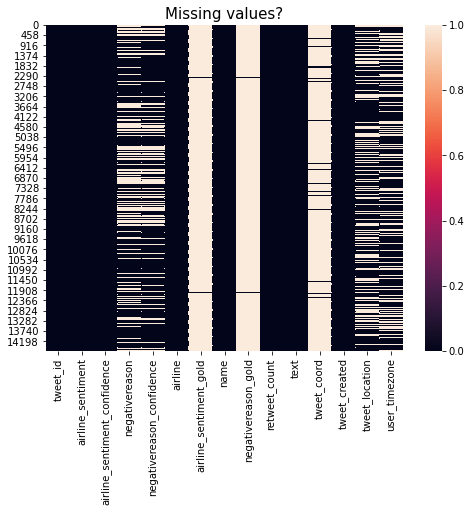

In [54]:
#Plot the missing values on all the features using heat map.
plt.figure(figsize=(8,6))
sns.heatmap(tweets.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [55]:
tweets.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- We can see missing values on negativereason, negativereason_confidence,airline_sentiment_gold,negativereason_gold, tweet_cord,tweet_location,user_timezone

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [56]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(tweets)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
tweet_location,0,4733,32.3,4733,32.3,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


### 2. Do Exploratory data analysis(EDA) based on the below statement
 - a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
 - b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
 - c. Plot the word cloud graph of tweets for positive and negative sentiment separately.



#### a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

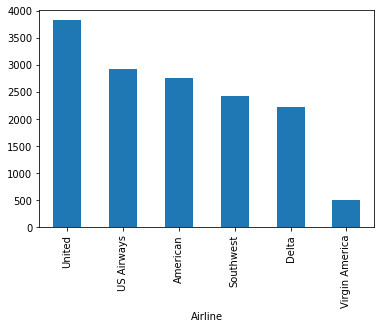

In [57]:
#bar plot distribution of the tweets across all the airline
tweets['airline'].value_counts().plot(kind='bar',xlabel='Airline')

- Distribution of all tweets across different airlines
    - United            3822
    - US Airways        2913
    - American          2759
    - Southwest         2420
    - Delta             2222
    - Virgin America     504

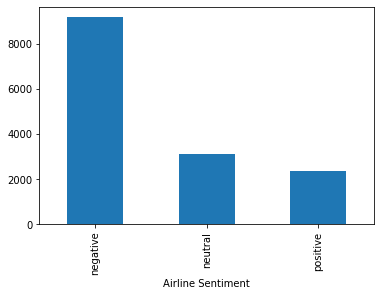

In [58]:
tweets['airline_sentiment'].value_counts().plot(kind='bar',xlabel='Airline Sentiment')

- Distribution of Sentiments across all tweets.
    - negative    9178
    - neutral     3099
    - positive    2363

#### b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

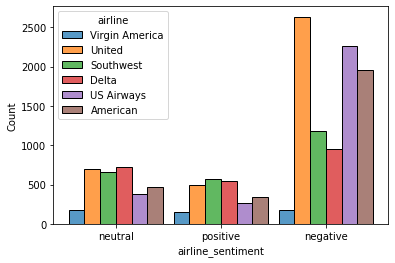

In [59]:
#hist plot distribution of the different airline sentiment for each airline.
sns.histplot(data=tweets, x="airline_sentiment",hue='airline', multiple="dodge", shrink=.9)

- Plotting the airline sentiment for each airline across different sentiments




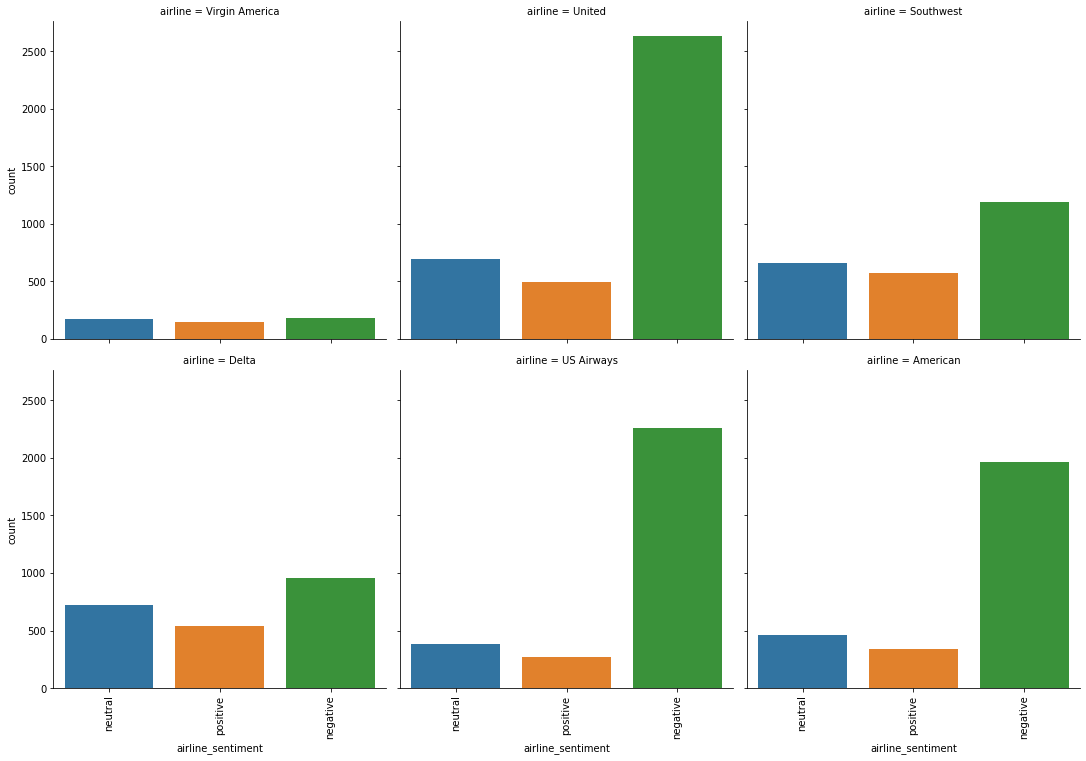

In [60]:
#cat plot of the airline sentiment for each airline (similar to above, but different view)
g=sns.catplot(x="airline_sentiment", col="airline", data=tweets, kind="count",col_wrap=3)
g.set_xticklabels(rotation=90)

- Plotting the airline sentiment for each airline across different sentiments (different view)

In [61]:
#value counts of the airline sentiment for each airline
tweets.groupby('airline')['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

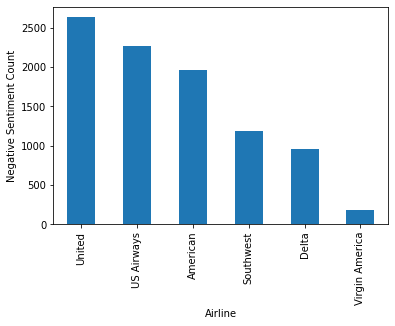

In [62]:
#distribution of the negative airline sentiment distribution for each airline.
tweets.loc[tweets['airline_sentiment'] == 'negative', 'airline'].value_counts().plot(kind='bar',xlabel='Airline',ylabel='Negative Sentiment Count')

- Plot the negative airline sentiment for each airlines.

In [63]:
#Value Counts for the Negative Reasons across all airlines.
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

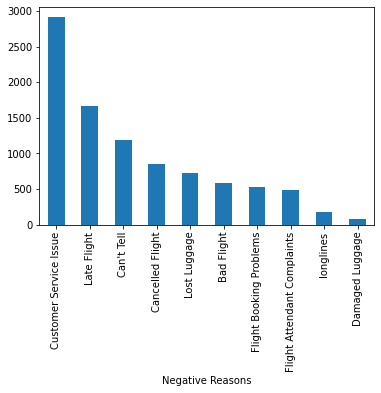

In [64]:
#Plot the negative reasons distribution across all airlines.
tweets['negativereason'].value_counts().plot(kind='bar',xlabel='Negative Reasons')

- Plotting the negative reasons distribution across all airlines.

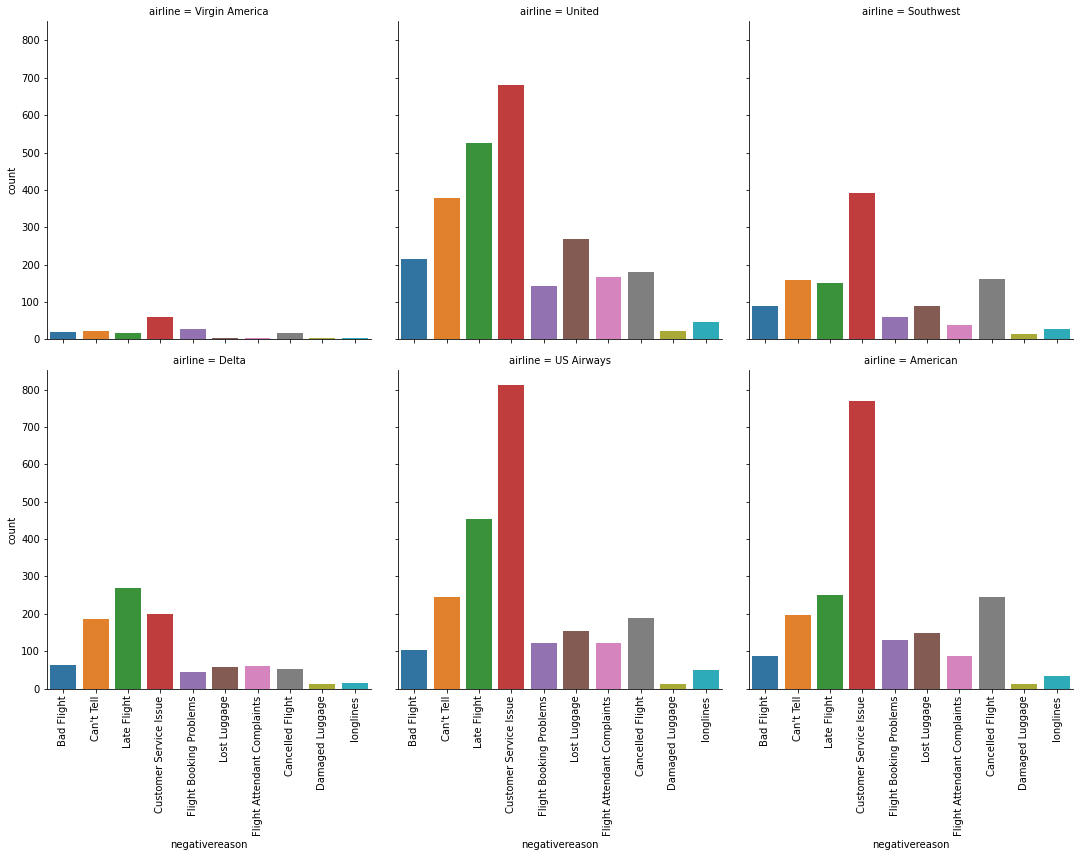

In [65]:
#plotting the negative reasons distribution for each airline.
g=sns.catplot(x="negativereason", col="airline", col_wrap=3,
                data=tweets,
                kind="count")
g.set_xticklabels(rotation=90)

#### c. Plot the word cloud graph of tweets for positive and negative sentiment separately.

In [66]:
#Function to plot the different positive sentiement words from the text column in the tweet.
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [67]:
# Splitting the positive and negative sentiment based on the airline sentiment value (positive and negative)
Positive_sent = tweets[tweets['airline_sentiment']=='positive']
Negative_sent = tweets[tweets['airline_sentiment']=='negative']

In [68]:
#print the number of positive and negative sentiment across all the tweets.
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


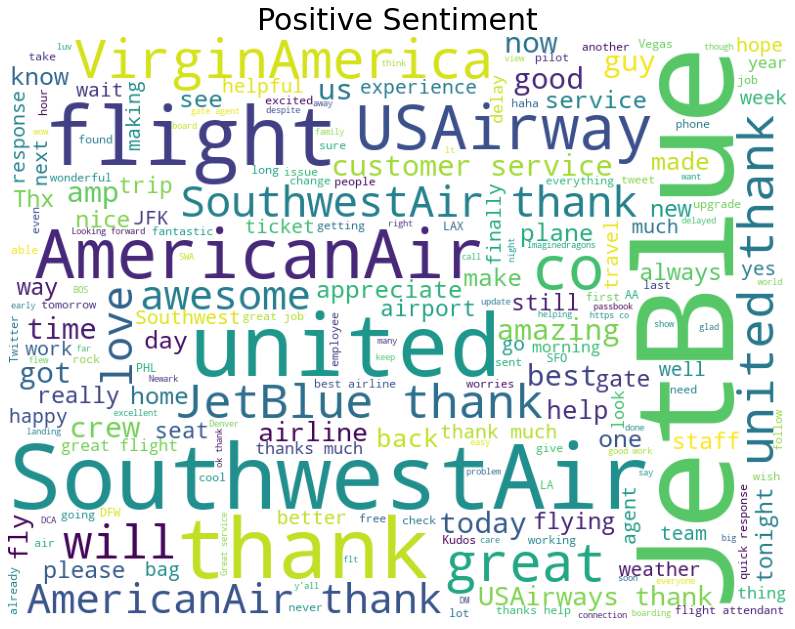

In [69]:
# Show the positive word values
show_wordcloud(Positive_sent, "Positive Sentiment")

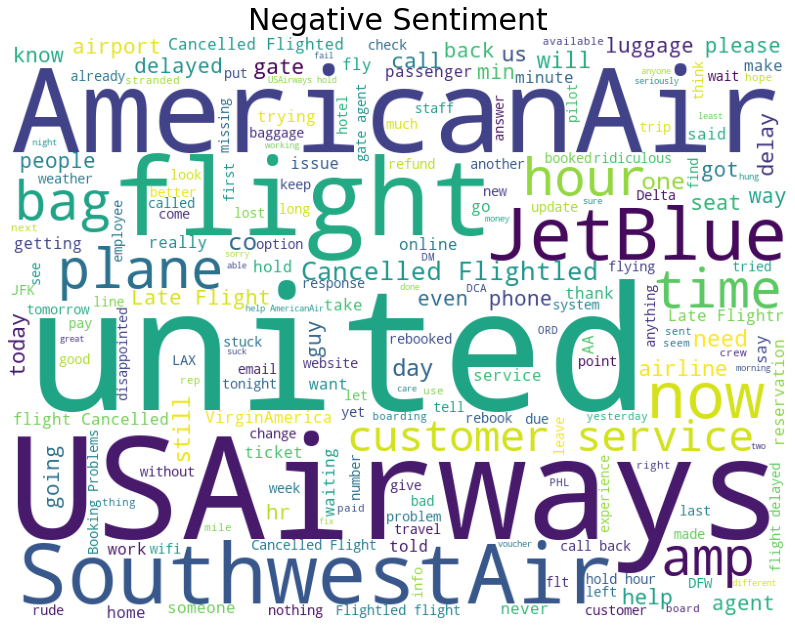

In [70]:
#Show the Negative Sentiment Word Clouds
show_wordcloud(Negative_sent, "Negative Sentiment")

### 3. Understand of data columns:
  - a. Drop all other columns except “text” and “airline_sentiment”
  - b. Check the shape of the data.
  - c. Print the first 5 rows of data.

In [71]:
#Drop all columns except text and airline_sentiment
drop_var = ['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold',
            'name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone']
tweets.drop(drop_var, axis=1, inplace=True)

In [72]:
#Print the shape after the columns are dropped
tweets.shape

(14640, 2)

In [73]:
#Look at the top 5 values after dropping the columns
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [74]:
#Look at the different sentiment values.
tweets['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

### 4. Text pre-processing: Data preparation
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
  - a. Html tag removal.
  - b. Tokenization.
  - c. Remove the numbers.
  - d. Removal of Special Characters and Punctuations.
  - e. Removal of stopwords
  - f. Conversion to lowercase.
  - g. Lemmatize or stemming.
  - h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
  - i. Print the first 5 rows of data after pre-processing.

#### Text Preprocessing - removal of http links

In [75]:
#Function to remove the html tags from the text content
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")    # Removing HTML tags
    return soup.get_text()

tweets['text'] = tweets['text'].apply(lambda x: strip_html(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Pre processing: De-contraction of words

In [76]:
!pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

In [77]:
#Function to replace contraction (e.g. replace I'm --> I am) and so on)
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

tweets['text'] = tweets['text'].apply(lambda x: replace_contractions(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [78]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre Processing : Removal of number

In [79]:
#Function to remove the numbers from the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

tweets['text'] = tweets['text'].apply(lambda x: remove_numbers(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


#### Pre Processing - Tokenization

In [80]:
#Tokenization of Data on the text field.
tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweets.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


#### Preprocessing: Removal of Punctuation and Special Characters

In [81]:
#Function to remove the punctuation and any special characters
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

#### Remove non-ascii character

In [82]:
#Function to remove any non ascii characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

#### PreProcessing Lower Case

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [83]:
#Function to convert the characters to lower case.
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [84]:
#tweets['text'] = tweets['text'].apply(lambda x: to_lowercase(x))
#tweets.head()

#### Preprocessing: Removal of StopWords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [85]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [87]:
#Function to remove the stopwords from the text.
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [88]:
#tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))
#tweets.head()

#### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [89]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [90]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
#function to lematize words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

#tweets['text'] = tweets['text'].apply(lambda x: lemmatize_list(x))
#tweets.head()

#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [92]:
#Function to call all the preprocessing steps under one funcition and then join the words.
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets['text'] = tweets.apply(lambda row: normalize(row['text']), axis=1)
tweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


- Above 5 rows shows a decent peek of the text after the preprocessing.

In [93]:
#Function to remove the firstword from the text
#Almost all the tweets has the first word as the airline name, so removing the first word from the tweet text
def remove_firstword(text):
  text = re.sub(r'^\W*\w+\W*', '', text)
  return text

tweets['text'] = tweets['text'].apply(lambda x: remove_firstword(x))
tweets.head()

,airline_sentiment,text
0,neutral,dhepburn said
1,positive,plus added commercial experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [95]:
tweets.tail()

,airline_sentiment,text
14635,positive,thank got different flight chicago
14636,negative,leaving minute late flight warning communicati...
14637,neutral,please bring american airline blackberry
14638,negative,money change flight not answer phone suggestio...
14639,neutral,ppl need know many seat next flight plz put u ...


### 5. Vectorization:
  - a. Use CountVectorizer
  - b. Use TfidfVectorize

#### Building the model based on CountVectorizer and Random Forest

In [96]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(tweets['text'])

data_features = data_features.toarray() 

In [97]:
data_features.shape

(14640, 2000)

In [98]:
#Assigning the labels to numbers
labels = { "neutral":0,"positive":1,"negative":2}
y=tweets['airline_sentiment'].map(labels).astype('int')
y.unique()

array([0, 1, 2])

In [99]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.3, random_state=42)

In [100]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, y, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7329918032786886


- We could see a score of 73% when we run the model using countvectorizer and RandomForest on the training data 

### Building the model on Term Frequency(TF) - Inverse Document Frequency(IDF) and RandomForest

In [101]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features_tfidf = vectorizer.fit_transform(tweets['text'])

data_features_tfidf = data_features_tfidf.toarray()

data_features_tfidf.shape

(14640, 2000)

In [102]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(data_features_tfidf, y, test_size=0.3, random_state=42)

In [103]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest_tfidf = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest_tfidf = forest_tfidf.fit(X_train_tfidf, y_train)

print(forest_tfidf)

print(np.mean(cross_val_score(forest, data_features_tfidf, y, cv=5)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7512295081967213


- We could see a slight increase in accuracy(75%) when we run the model with TfiDF and RandomForest on the training data.



### 6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types of vectorization. 
- Print the top 40 features and plot their word cloud using both types of vectorization.

#### Count Vectorizer : Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [104]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [105]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

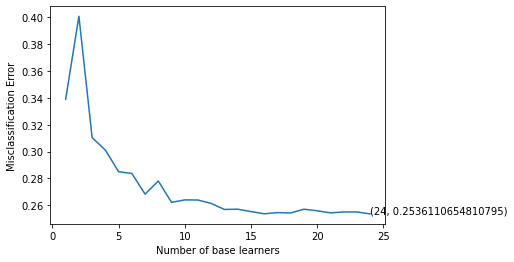

Optimal Learners 24


In [106]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()
print("Optimal Learners",optimal_learners)

- We can see the optimal learners is 24 with error of around 25%

In [107]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7700364298724954

- On the test data with the optimal learner of 24, we can see the accuracy has improved to 77%

In [108]:
#predict the model results on the test data
result =  clf.predict(X_test)

[[ 457   81  346]
 [  97  433  164]
 [ 217  105 2492]]
0.7700364298724953


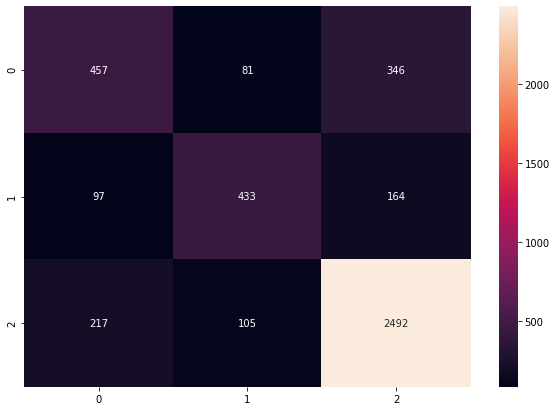

In [109]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
# The results on the test data is used to draw the confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- We can see from the confusion matrix that the diagonal on the matrix shows the numbers which are predicred correctly.
- 2492 negative predictions are predicted correctly
- 433 positive predictions are predicted correctly
- 457 neutral predictions are predicted correctly.


#### TFIDF : Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [110]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

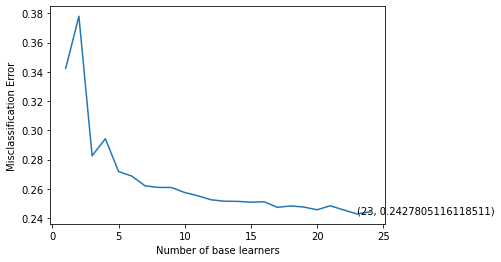

Optimal Learners 23


In [111]:
# plotting the error as k increases and finding out the optimal learners
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()
print("Optimal Learners",optimal_learners)

- We can see the optimal learners is 23 and around 24% error rate for the TfiDF with Random Forest

In [112]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_tfidf, y_train)
clf.score(X_test_tfidf, y_test)

0.7818761384335154

- We can see the accuracy is slightly higher (78%) compared to the countvectorizer.

In [113]:
#predicting the results on test data
result = clf.predict(X_test_tfidf)                #saving the prediction on test data as a result

[[ 463   65  356]
 [  83  401  210]
 [ 187   57 2570]]
0.7818761384335154


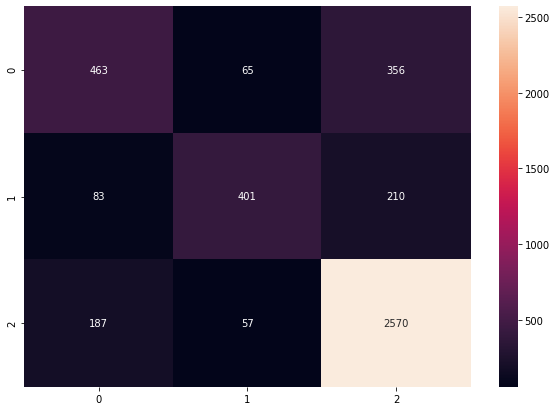

In [114]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
# The results on the test data is used to draw the confusion matrix.
result =  clf.predict(X_test_tfidf)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- We can see from the confusion matrix that the diagonal on the matrix shows the numbers which are predicred correctly.
- 2570 negative predictions are predicted correctly
- 401 positive predictions are predicted correctly
- 463 neutral predictions are predicted correctly

#### Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model

In [115]:
#print the top 40 important features / words and print it as a word cloud for the count vectorizer model.

all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)
                         
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(1, figsize=(14, 11), frameon='equal')
#plt.title('Top 40 features WordCloud', fontsize=30)
#plt.axis("off")
#plt.show()

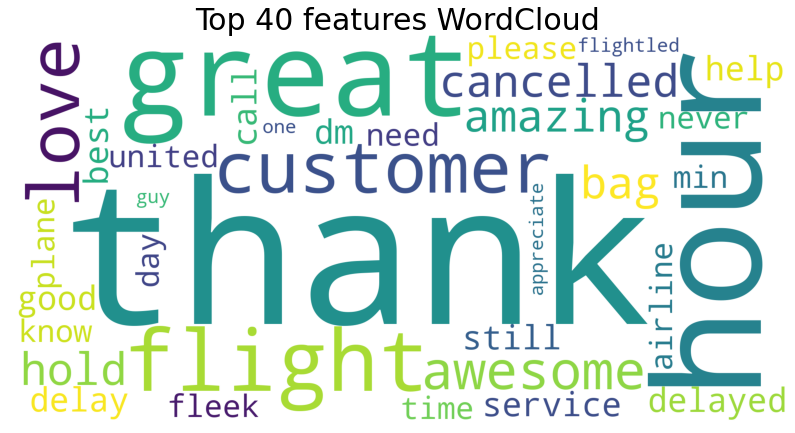

In [116]:
#Displaying the generated image of the word cloud for the countvectorizer+Random Forest Model
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(wordcloud)  
plt.axis('off')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.show()

#### Word Cloud of top 40 important features from the TFiDF + Random Forest based model

In [117]:
#print the top 40 important features / words and print it as a word cloud for the TfiDF vectorizer model.
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.figure(1, figsize=(30, 30), frameon='equal')
#plt.title('Top 40 features WordCloud', fontsize=30)
#plt.axis("off")
#plt.show()

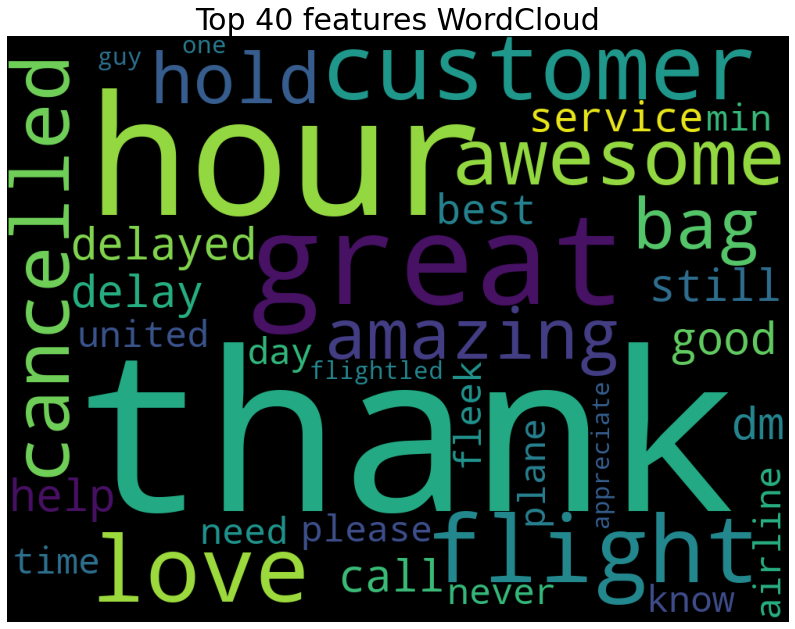

In [118]:
#Displaying the generated image of the word cloud for the TfiDF+Random Forest Model
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(wordcloud)  
plt.axis('off')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.show()

### 7. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset

### **Summary**:
- We used a dataset which has **reviews in text format and their sentiment score on the scale of 0 to 2 (neutral, positive, negative).**
- The goal was to **build a model for text-classification**.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary of positive and negative sentiment.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model. We used countVectorizer and TDiDF for the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, **our model performed well in perspective of how text classification models perform.** 
- We've currently only used 2000 features for our model, may be we can see how the model behaves when we increase these feature count. **We can also increase the max_feature parameter in the vectorizer and evaluate the model.**
- We can apply **other models(AdaBoost, XGBoost with Gradient Boost etc) tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further or understand how different models work when it comes to text classification.
- We can see that the accuracy has **increased from 73/75 % to around 77/78% when the RandomForest model was tuned.**
- Between the two vectorizers we could see the **negative prediction % has increased with the TfiDF + Random Forest Model compared to countVectorizer + RandomForest Model. In general there is a slight increase in the total accuracy b/w countVectorizer + RandomForest and TfiDF + RandomForest**
- Wordcloud (top 40 features) we see from both the countvectorizer and TfIdf models are very different from the quicklook. **Though there are some similarities but there are quite different features which are prominent between these two models.**